## **🧪Segmentasi Siswa Berdasarkan Skor Ujian Menggunakan K-Means Clustering**

###🎯Tujuan:
Mengelompokkan siswa berdasarkan skor matematika, membaca, dan menulis mereka, untuk menemukan pola performa siswa.

**1. Import/Instalasi Library**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


**2. Upload File**

Dari Komputer:

In [4]:
# Upload manual dari komputermu
from google.colab import files
uploaded = files.upload()

# Load dataset ke dataframe
df = pd.read_csv("StudentsPerformance.csv")
df.head()

Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Atau dari Google Drive:

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti path sesuai lokasi file kamu
file_path = '/content/drive/My Drive/CapstoneData/StudentsPerformance.csv'

# Load dataset
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**3. Seleksi Fitur yang Dipakai untuk Clustering**

In [6]:
# Ambil fitur numerik yang relevan
X = df[['math score', 'reading score', 'writing score']]

**4. Normalisasi Data**

In [7]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**5. Menentukan Jumlah Cluster (Metode Elbow)**

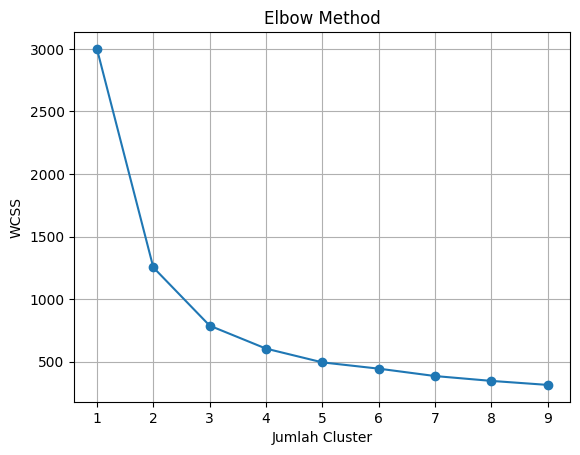

In [8]:
# Metode Elbow
wcss = []  # within-cluster sum of square
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

NB: Lihat grafiknya: titik “tekukan” menunjukkan jumlah cluster terbaik (misal: 3).

**6. Terapkan K-Means Clustering**

Misalnya kamu pilih 3 cluster berdasarkan hasil Elbow.

In [9]:
# Terapkan KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


**7. Visualisasi Cluster**

Menampilkan grafik 3D untuk clustering siswa berdasarkan skor:

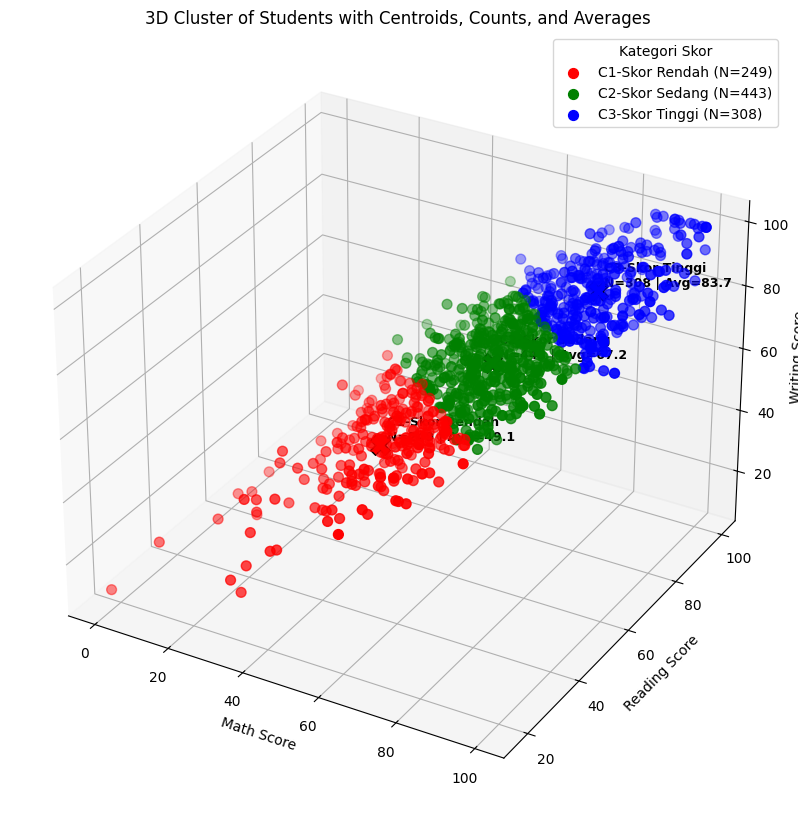

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Hitung rata-rata skor gabungan per cluster
df['total_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
cluster_means = df.groupby('cluster')['total_score'].mean().sort_values()

# 2. Label & warna berdasarkan urutan skor
score_labels = ['C1-Skor Rendah', 'C2-Skor Sedang', 'C3-Skor Tinggi']
colors = ['r', 'g', 'b']

cluster_label_map = {
    cluster: score_labels[i]
    for i, cluster in enumerate(cluster_means.index)
}
color_map = {
    cluster: colors[i]
    for i, cluster in enumerate(cluster_means.index)
}

# 3. Buat plot
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in cluster_means.index:
    subset = df[df['cluster'] == cluster]

    # Data scatter
    ax.scatter(
        subset['math score'],
        subset['reading score'],
        subset['writing score'],
        c=color_map[cluster],
        label=f"{cluster_label_map[cluster]} (N={len(subset)})",
        s=50
    )

    # Hitung centroid
    centroid = subset[['math score', 'reading score', 'writing score']].mean()

    # Plot centroid
    ax.scatter(
        centroid['math score'],
        centroid['reading score'],
        centroid['writing score'],
        c=color_map[cluster],
        marker='X',
        s=200,
        edgecolor='black'
    )

    # Rata-rata total skor cluster
    avg_score = subset['total_score'].mean()
    student_count = len(subset)

    # Teks label centroid
    ax.text(
        centroid['math score'] + 1,
        centroid['reading score'] + 1,
        centroid['writing score'] + 1,
        f"{cluster_label_map[cluster]}\nN={student_count} | Avg={avg_score:.1f}",
        fontsize=9,
        weight='bold'
    )

# Label sumbu
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')

# Judul
plt.title('3D Cluster of Students with Centroids, Counts, and Averages')
ax.legend(title='Kategori Skor')
plt.show()


**8. Analisis dan Interpretasi**

In [11]:
# Statistik tiap cluster
df.groupby('cluster')[['math score', 'reading score', 'writing score']].mean().round(2)


,math score,reading score,writing score
cluster,,,
0,65.34,68.46,67.82
1,48.10,50.67,48.49
2,81.71,85.15,84.21


**9. Simpan Hasil/Download Hasil menjadi file .csv**

In [ ]:
df.to_csv("student_clustered.csv", index=False)
files.download("student_clustered.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>